In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model

/Users/hkromer/anaconda3/envs/py3.7/lib/python3.7/site-packages/ipykernel_launcher.py:3: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  This is separate from the ipykernel package so we can avoid doing imports until


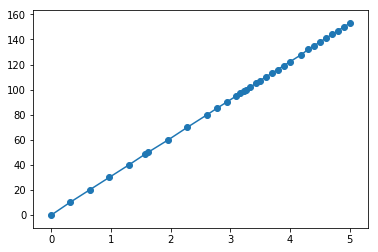

In [39]:
fname = '/Users/hkromer/02_PhD/01.github/phd/01_neutron_generator_contol/HV_readout_calibration.txt'

data = pd.read_csv(fname, delimiter='\t+')


plt.plot(data['Voltage_read'], data['HV_voltage'])
plt.scatter(data['Voltage_read'], data['HV_voltage'])
plt.show()


In [20]:
# linear regression
train = data.iloc[0:19,:]
pred = data.iloc[18:,:]
# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(train['Voltage_read'].values.reshape(-1, 1), train['HV_voltage'].values)

# Make predictions using the testing set
y_pred = regr.predict(pred['Voltage_read'].values.reshape(-1, 1))
y_pred

array([106.96011849, 110.01512877, 113.07013904, 116.12514931,
       119.18015959, 122.23516986, 128.34519041])

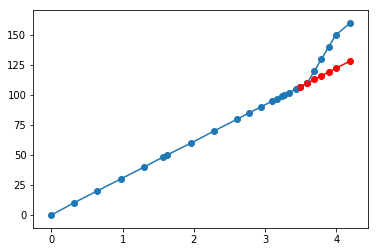

In [21]:
plt.plot(data['Voltage_read'], data['HV_voltage'])
plt.scatter(data['Voltage_read'], data['HV_voltage'])
plt.plot(pred['Voltage_read'].values,y_pred, color='red')
plt.scatter(pred['Voltage_read'].values,y_pred, color='red')
plt.show()

plt.show()


In [26]:
pd.DataFrame(y_pred, pred['Voltage_read'].values).reset_index()

,index,0
0,3.49,106.960118
1,3.59,110.015129
2,3.69,113.070139
3,3.79,116.125149
4,3.89,119.180160
5,3.99,122.235170
6,4.19,128.345190


In [37]:
x = np.arange(4.2,5+0.1,0.1)
y_pred = regr.predict(x.reshape(-1, 1)).round(0)
pd.DataFrame(y_pred, x).reset_index()

,index,0
0,4.2,129.0
1,4.3,132.0
2,4.4,135.0
3,4.5,138.0
4,4.6,141.0
5,4.7,144.0
6,4.8,147.0
7,4.9,150.0
8,5.0,153.0
